# [How to identify the right independent variables for Machine Learning Supervised Algorithms?](https://towardsdatascience.com/how-to-identify-the-right-independent-variables-for-machine-learning-supervised-algorithms-439986562d32)


There is a very famous acronym GIGO in the field of computer science which I have learnt in my school days. GIGO stands for garbage in and garbages out. Essentially it means that if we feed inappropriate and junk data to computer programs and algorithms, then it will result in junk and incorrect results.
Machine learning algorithms are the same as us human beings. Broadly machine learning algorithms have two phases — learning and predicting. 

Learning environment and parameters should be similar to the condition in which prediction to be done in future. Algorithms trained on an unbiased data sample, and permutations of the input variables values a true reflection of full population dataset are well equipped to make an accurate prediction.

One of the cornerstones for the success of the Supervised machine learning algorithms is selecting the right set of the independent variable for the learning phase. In this article, I will discuss a structured approach to select the right independent variables to feed the algorithms. We do not want to overfeed redundant data points i.e. highly related (**Multicollinearity**) data and complicate the model without increasing the prediction accuracy. In fact, sometime overfeeding the data can decrease the prediction accuracy. On the other hand, we need to make sure that the model is not oversimplified and reflects true complexity.

---

## Objective

We want to build a model to predict the stock price of the company ASML. We have downloaded the stock price data of few of the ASML’s customer, competitors and index points for the last 20 years. We are not sure which of these data points to include to build the ASML stock prediction model.

## Sample Data File

I have written a small function which I can call from different programs to download the stock price for the last 20 years.

In [2]:
"""Filename - GetStockData.py is a function to download the stock from 1st Jan 2000 until current date"""
import datetime as dt
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [3]:
def stockdata(ticker):
    start= dt.datetime(2000,1,1)    ## Start Date Range
    end=dt.datetime.now()    ## Curret date as end date Range
    Stock=web.DataReader(ticker, "yahoo", start, end)
    
    name=str(ticker) + ".xlsx"
    Stock.to_excel(name)
    return ()

Function stockdata() is called from another program with ticker symbols to download the data.

In [5]:
ticker= ["MU", "ASML","TSM","QCOM", "UMC", "^SOX", "INTC","^IXIC", 'AAPL']
for i in ticker:
    stockdata(i)

In [12]:
# 'path = os.getcwd()
# files= os.
# files_xls = [f for f in files if f[-3:] == 'xls']
# files_xls
# 
# df = pd.DataFrame()
# 
# def excel_to_dataframe(ticker):
#     name2="data/stock_data/" + str(ticker) + ".xlsx"
#     df = pd.read_excel(name2).append
#     return()
# 
# for j in ticker:
#     excel_to_dataframe(j)'

In [21]:
files = [file for file in os.listdir('./data/stock_data')]
stock_data = pd.DataFrame()
for file in files:
    df = pd.read_excel("./data/stock_data/"+file)
    stock_data=pd.merge(stock_data, df, on=, right_index=True)
#all_months_data.to_csv("all_data.csv",index=False)

/var/folders/r8/zdlnr35s6qz6zx67nmc9bdnm0000gn/T/ipykernel_73135/3544605027.py:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Low_x', 'High_x', 'Date_x', 'Close_x', 'Adj Close_x', 'Open_x', 'Volume_x'} in the result is deprecated and will raise a MergeError in a future version.
  stock_data=pd.merge(stock_data, df, left_index=True, right_index=True)


In [6]:
# ["MU", "ASML","TSM","QCOM", "UMC", "^SOX", "INTC","^IXIC"]
df1 = pd.read_excel("./data/stock_data/MU.xlsx")
df2 = pd.read_excel("./data/stock_data/ASML.xlsx")
df3 = pd.read_excel("./data/stock_data/TSM.xlsx")
df4 = pd.read_excel("./data/stock_data/QCOM.xlsx")
df5 = pd.read_excel("./data/stock_data/UMC.xlsx")
df6 = pd.read_excel("./data/stock_data/^SOX.xlsx")
df7 = pd.read_excel("./data/stock_data/INTC.xlsx")
df8 = pd.read_excel("./data/stock_data/^IXIC.xlsx")
df9 = pd.read_excel("./data/stock_data/AAPL.xlsx")

In [7]:
print(df1.head())
print(df2.head())
print(df3.head())

        Date      High       Low     Open     Close   Volume  Adj Close
0 2000-01-03  39.06250  36.25000  38.6875  37.96875  6564600  37.915749
1 2000-01-04  37.90625  36.43750  37.3750  36.50000  7220800  36.449051
2 2000-01-05  37.37500  35.03125  36.0625  36.37500  6763800  36.324226
3 2000-01-06  37.65625  35.87500  36.3750  37.00000  6338400  36.948353
4 2000-01-07  36.87500  34.00000  36.8750  35.25000  9467200  35.200794
        Date       High        Low       Open      Close   Volume  Adj Close
0 2000-01-03  43.875000  41.906250  43.875000  43.640625  1121600  27.781425
1 2000-01-04  42.562500  40.593750  41.953125  40.734375   968800  25.931318
2 2000-01-05  39.703125  37.757812  39.281250  39.609375  1458133  25.215149
3 2000-01-06  37.593750  35.226562  36.750000  37.171875  3517867  23.663450
4 2000-01-07  38.062500  36.656250  36.867188  38.015625  1631200  24.200581
        Date       High        Low       Open      Close   Volume  Adj Close
0 2000-01-03  18.007015  17.4

In [8]:
# ["MU", "ASML","TSM","QCOM", "UMC", "^SOX", "INTC","^IXIC"]
data1 = df1.join(df2['Adj Close'],how='outer', lsuffix='_MU', rsuffix='_ASML')
data2 = data1.join(df3['Adj Close'],how='outer', rsuffix='_TSM')
data3 = data2.join(df4['Adj Close'],how='outer', rsuffix='_QCOM')
data4 = data3.join(df5['Adj Close'],how='outer', rsuffix='_UMC')
data5 = data4.join(df6['Adj Close'],how='outer', rsuffix='_^SOX')
data6 = data5.join(df7['Adj Close'],how='outer', rsuffix='_INTC')
data7 = data6.join(df8['Adj Close'],how='outer', rsuffix='_^IXIC')
data = data7.join(df8['Adj Close'],how='outer', rsuffix='_AAPL')

In [9]:
data.head()

,Date,High,Low,Open,Close,Volume,Adj Close_MU,Adj Close_ASML,Adj Close,Adj Close_QCOM,Adj Close_UMC,Adj Close_^SOX,Adj Close_INTC,Adj Close_^IXIC,Adj Close_AAPL
0,2000-01-03,39.06250,36.25000,38.6875,37.96875,6564600,37.915749,27.781425,9.582471,60.963459,7.933463,712.855103,26.828459,4131.149902,4131.149902
1,2000-01-04,37.90625,36.43750,37.3750,36.50000,7220800,36.449051,25.931318,9.645679,55.098755,8.429304,686.987610,25.575686,3901.689941,3901.689941
2,2000-01-05,37.37500,35.03125,36.0625,36.37500,6763800,36.324226,25.215149,9.708890,53.186337,8.429304,678.211792,25.787708,3877.540039,3877.540039
3,2000-01-06,37.65625,35.87500,36.3750,37.00000,6338400,36.948353,23.663450,9.304352,47.619072,7.968880,669.006287,24.284380,3727.129883,3727.129883
4,2000-01-07,36.87500,34.00000,36.8750,35.25000,9467200,35.200794,24.200581,9.658322,50.997677,7.862628,690.415955,25.286606,3882.620117,3882.620117


In [10]:
data.drop(labels=['High', 'Low', 'Open', 'Close', 'Volume'],inplace=True, axis=1)
data.head()

,Date,Adj Close_MU,Adj Close_ASML,Adj Close,Adj Close_QCOM,Adj Close_UMC,Adj Close_^SOX,Adj Close_INTC,Adj Close_^IXIC,Adj Close_AAPL
0,2000-01-03,37.915749,27.781425,9.582471,60.963459,7.933463,712.855103,26.828459,4131.149902,4131.149902
1,2000-01-04,36.449051,25.931318,9.645679,55.098755,8.429304,686.987610,25.575686,3901.689941,3901.689941
2,2000-01-05,36.324226,25.215149,9.708890,53.186337,8.429304,678.211792,25.787708,3877.540039,3877.540039
3,2000-01-06,36.948353,23.663450,9.304352,47.619072,7.968880,669.006287,24.284380,3727.129883,3727.129883
4,2000-01-07,35.200794,24.200581,9.658322,50.997677,7.862628,690.415955,25.286606,3882.620117,3882.620117


In [11]:
data.rename(columns={'Adj Close': 'Adj Close_TSM'}, inplace=True)
data.head()

,Date,Adj Close_MU,Adj Close_ASML,Adj Close_TSM,Adj Close_QCOM,Adj Close_UMC,Adj Close_^SOX,Adj Close_INTC,Adj Close_^IXIC,Adj Close_AAPL
0,2000-01-03,37.915749,27.781425,9.582471,60.963459,7.933463,712.855103,26.828459,4131.149902,4131.149902
1,2000-01-04,36.449051,25.931318,9.645679,55.098755,8.429304,686.987610,25.575686,3901.689941,3901.689941
2,2000-01-05,36.324226,25.215149,9.708890,53.186337,8.429304,678.211792,25.787708,3877.540039,3877.540039
3,2000-01-06,36.948353,23.663450,9.304352,47.619072,7.968880,669.006287,24.284380,3727.129883,3727.129883
4,2000-01-07,35.200794,24.200581,9.658322,50.997677,7.862628,690.415955,25.286606,3882.620117,3882.620117


In [12]:
print(f'Column Names before change: {list(data.columns)}')
df2 = data.copy()
cols = df2.columns.tolist()
cols = [col.replace('Adj Close_', '') for col in cols]
#cols = [col.replace('#', 'num') for col in cols]
cols = [col.upper() for col in cols]
df2.columns = cols

print()
print(f'Column Names after change: {list(df2.columns)}')
data = df2 #de-comment to make changes inplace

Column Names before change: ['Date', 'Adj Close_MU', 'Adj Close_ASML', 'Adj Close_TSM', 'Adj Close_QCOM', 'Adj Close_UMC', 'Adj Close_^SOX', 'Adj Close_INTC', 'Adj Close_^IXIC', 'Adj Close_AAPL']

Column Names after change: ['DATE', 'MU', 'ASML', 'TSM', 'QCOM', 'UMC', '^SOX', 'INTC', '^IXIC', 'AAPL']


In [13]:
data.set_index("DATE", inplace= True)

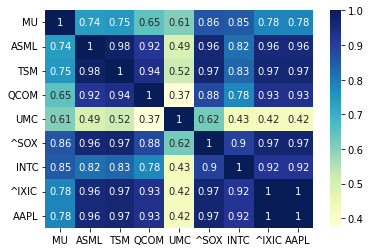

In [14]:
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [15]:
data.info();

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5483 entries, 2000-01-03 to 2021-10-15
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MU      5483 non-null   float64
 1   ASML    5483 non-null   float64
 2   TSM     5483 non-null   float64
 3   QCOM    5483 non-null   float64
 4   UMC     5303 non-null   float64
 5   ^SOX    5483 non-null   float64
 6   INTC    5483 non-null   float64
 7   ^IXIC   5483 non-null   float64
 8   AAPL    5483 non-null   float64
dtypes: float64(9)
memory usage: 428.4 KB


In [16]:
X=data.drop(["UMC"], axis=1)
vif = pd.DataFrame()
vif["features"] = X.columns
vif["vif_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

  features  vif_Factor
0       MU   18.967194
1     ASML   45.028756
2      TSM   68.531123
3     QCOM   29.222383
4     ^SOX  127.809442
5     INTC   83.061894
6    ^IXIC         inf
7     AAPL         inf


/usr/local/Caskroom/miniconda/base/envs/mach_lern/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


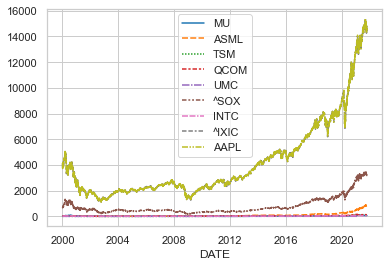

In [18]:
#data = data.rolling(7).mean()
sns.set_theme(style="whitegrid")
#sns.set(plt.setp(yticks=[0,5,5]))

sns.lineplot(data=data, palette="tab10");